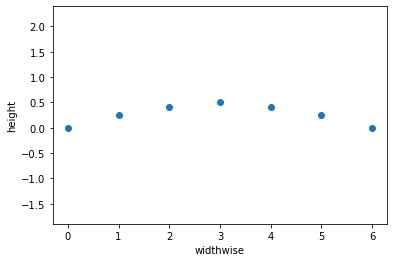

In [1]:
# Read in points and show them in 2D

import numpy as np
import matplotlib.pyplot as plt

points = np.genfromtxt(
    'bridge.csv',
    delimiter=',',
    skip_header=True)

plt.axis('equal')
plt.xlabel('widthwise')
plt.ylabel('height')
plt.scatter(points[:,0], points[:,2])

In [2]:
# A simple output which linearly interpolates

feed = 1.0 # How fast to go
gcode = [] # List of G-code instructions

# Initial position
x0, _, y0 = points[0]
gcode.append(f'G0 X{x0:.3f} Y{y0:.3f}')

# Additional positions, move in a straight line
for x, _, y in points[1:]:
    gcode.append(f'G1 X{x:.3f} Y{y:.3f} F{feed:.3f}')
    
# Show the gcode file
print('\n'.join(gcode))

G0 X0.000 Y0.000
G1 X1.000 Y0.250 F1.000
G1 X2.000 Y0.400 F1.000
G1 X3.000 Y0.500 F1.000
G1 X4.000 Y0.400 F1.000
G1 X5.000 Y0.250 F1.000
G1 X6.000 Y0.000 F1.000


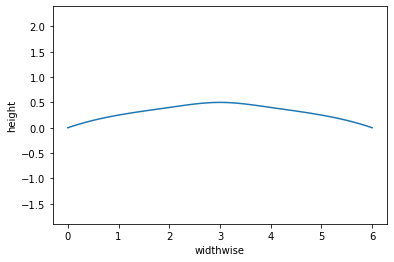

In [3]:
# We can interpolate a better curve

from scipy.interpolate import interp1d

curve = interp1d(
    points[:,0],
    points[:,2],
    kind='cubic')

num_pts = 100 # how many points across the length of the curve
xs = np.linspace(points[:,0].min(), points[:,0].max(), num_pts)
ys = curve(xs)

plt.axis('equal')
plt.xlabel('widthwise')
plt.ylabel('height')
plt.plot(xs, ys)

In [4]:
# Output interpolated G-code

gcode = []

# Initial position
gcode.append(f'G0 X{xs[0]:.3f} Y{ys[0]:.3f}')

# We will still move in straight lines, but many more of them
# Note: G-code can theoretically represent cubic curves directly but it is difficult and machine-specific
for x, y in zip(xs, ys):
    gcode.append(f'G1 X{x:.3f} Y{y:.3f} F{feed:.3f}')
    
# Show the bigger gcode file
print('\n'.join(gcode))

G0 X0.000 Y0.000
G1 X0.000 Y0.000 F1.000
G1 X0.061 Y0.020 F1.000
G1 X0.121 Y0.040 F1.000
G1 X0.182 Y0.059 F1.000
G1 X0.242 Y0.077 F1.000
G1 X0.303 Y0.094 F1.000
G1 X0.364 Y0.111 F1.000
G1 X0.424 Y0.127 F1.000
G1 X0.485 Y0.142 F1.000
G1 X0.545 Y0.156 F1.000
G1 X0.606 Y0.171 F1.000
G1 X0.667 Y0.184 F1.000
G1 X0.727 Y0.197 F1.000
G1 X0.788 Y0.210 F1.000
G1 X0.848 Y0.222 F1.000
G1 X0.909 Y0.233 F1.000
G1 X0.970 Y0.245 F1.000
G1 X1.030 Y0.255 F1.000
G1 X1.091 Y0.266 F1.000
G1 X1.152 Y0.276 F1.000
G1 X1.212 Y0.286 F1.000
G1 X1.273 Y0.295 F1.000
G1 X1.333 Y0.305 F1.000
G1 X1.394 Y0.314 F1.000
G1 X1.455 Y0.323 F1.000
G1 X1.515 Y0.332 F1.000
G1 X1.576 Y0.340 F1.000
G1 X1.636 Y0.349 F1.000
G1 X1.697 Y0.357 F1.000
G1 X1.758 Y0.366 F1.000
G1 X1.818 Y0.374 F1.000
G1 X1.879 Y0.383 F1.000
G1 X1.939 Y0.391 F1.000
G1 X2.000 Y0.400 F1.000
G1 X2.061 Y0.409 F1.000
G1 X2.121 Y0.417 F1.000
G1 X2.182 Y0.426 F1.000
G1 X2.242 Y0.435 F1.000
G1 X2.303 Y0.443 F1.000
G1 X2.364 Y0.451 F1.000
G1 X2.424 Y0.459 F1.000

In [5]:
# Future efforts:
# - It is possible to interpolate the entire 3D surface of the violin using
#   interp2d but it is more work to make that data useful 
# - The tool path is not offset from the cut at all
# - Use G2 and G3 instead of just G1 as described in 
#   https://www.sciencedirect.com/science/article/abs/pii/001044859490099X
# - This can be run as a stand-alone python program rather than a notebook
# - Cut other surfaces of the bridge (top, front, etc)